In [4]:
# Load required libraries
library(tidyverse)
library(dplyr)

# Read the raw data
sales_raw <- read.csv("product_sales.csv")

# Initial data check
str(sales_raw)
summary(sales_raw)

# Check for missing values in each column
colSums(is.na(sales_raw))

# Data cleaning process
sales_clean <- sales_raw %>%
  # Convert revenue to numeric (in case it's character)
  mutate(revenue = as.numeric(revenue)) %>%
  
  # Standardize sales method categories
  mutate(sales_method = case_when(
    tolower(sales_method) %in% c("email", "em") ~ "Email",
    tolower(sales_method) == "call" ~ "Call",
    TRUE ~ "Email + Call"
  )) %>%
  
  # Cap years_as_customer at 41 (2025 - 1984)
  mutate(years_as_customer = pmin(years_as_customer, 41)) %>%
  
  # Remove rows with invalid revenue
  filter(!is.na(revenue)) %>%
  
  # Ensure revenue is rounded to 2 decimal places
  mutate(revenue = round(revenue, 2))

# Verification after cleaning
# Check unique values in each column
sapply(sales_clean, function(x) length(unique(x)))

# Summary statistics of cleaned data
summary(sales_clean)

# Compare dimensions before and after cleaning
cat("Rows before cleaning:", nrow(sales_raw), "\n")
cat("Rows after cleaning:", nrow(sales_clean), "\n")

# Check distribution of sales methods after cleaning
table(sales_clean$sales_method)

# Basic statistics for numeric columns
sales_clean %>%
  summarise(
    avg_revenue = mean(revenue),
    med_revenue = median(revenue),
    min_revenue = min(revenue),
    max_revenue = max(revenue),
    avg_years = mean(years_as_customer),
    avg_visits = mean(nb_site_visits)
  )

# Save cleaned data (optional)
# write.csv(sales_clean, "sales_data_cleaned.csv", row.names = FALSE)

'data.frame':	15000 obs. of  8 variables:
 $ week             : int  2 6 5 4 3 6 4 1 5 5 ...
 $ sales_method     : chr  "Email" "Email + Call" "Call" "Email" ...
 $ customer_id      : chr  "2e72d641-95ac-497b-bbf8-4861764a7097" "3998a98d-70f5-44f7-942e-789bb8ad2fe7" "d1de9884-8059-4065-b10f-86eef57e4a44" "78aa75a4-ffeb-4817-b1d0-2f030783c5d7" ...
 $ nb_sold          : int  10 15 11 11 9 13 11 10 11 11 ...
 $ revenue          : num  NA 225.5 52.5 NA 90.5 ...
 $ years_as_customer: int  0 1 6 3 0 10 9 1 10 7 ...
 $ nb_site_visits   : int  24 28 26 25 28 24 28 22 31 23 ...
 $ state            : chr  "Arizona" "Kansas" "Wisconsin" "Indiana" ...


      week       sales_method       customer_id           nb_sold     
 Min.   :1.000   Length:15000       Length:15000       Min.   : 7.00  
 1st Qu.:2.000   Class :character   Class :character   1st Qu.: 9.00  
 Median :3.000   Mode  :character   Mode  :character   Median :10.00  
 Mean   :3.098                                         Mean   :10.08  
 3rd Qu.:5.000                                         3rd Qu.:11.00  
 Max.   :6.000                                         Max.   :16.00  
                                                                      
    revenue       years_as_customer nb_site_visits     state          
 Min.   : 32.54   Min.   : 0.000    Min.   :12.00   Length:15000      
 1st Qu.: 52.47   1st Qu.: 1.000    1st Qu.:23.00   Class :character  
 Median : 89.50   Median : 3.000    Median :25.00   Mode  :character  
 Mean   : 93.93   Mean   : 4.966    Mean   :24.99                     
 3rd Qu.:107.33   3rd Qu.: 7.000    3rd Qu.:27.00                     
 Max. 

week      sales_method       customer_id           nb_sold 
                0                 0                 0                 0 
          revenue years_as_customer    nb_site_visits             state 
             1074                 0                 0                 0

week      sales_method       customer_id           nb_sold 
                6                 3             13926                10 
          revenue years_as_customer    nb_site_visits             state 
             6743                41                26                50

      week       sales_method       customer_id           nb_sold     
 Min.   :1.000   Length:13926       Length:13926       Min.   : 7.00  
 1st Qu.:1.000   Class :character   Class :character   1st Qu.: 9.00  
 Median :3.000   Mode  :character   Mode  :character   Median :10.00  
 Mean   :3.078                                         Mean   :10.04  
 3rd Qu.:4.000                                         3rd Qu.:11.00  
 Max.   :6.000                                         Max.   :16.00  
    revenue       years_as_customer nb_site_visits     state          
 Min.   : 32.54   Min.   : 0.000    Min.   :12.00   Length:13926      
 1st Qu.: 52.47   1st Qu.: 1.000    1st Qu.:23.00   Class :character  
 Median : 89.50   Median : 3.000    Median :25.00   Mode  :character  
 Mean   : 93.93   Mean   : 4.977    Mean   :24.95                     
 3rd Qu.:107.33   3rd Qu.: 7.000    3rd Qu.:27.00                     
 Max.   :238.32   Max.   :41.000    Max.   :37.00                     

Rows before cleaning: 15000 
Rows after cleaning: 13926 



        Call        Email Email + Call 
        4781         6922         2223 

avg_revenue,med_revenue,min_revenue,max_revenue,avg_years,avg_visits
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
93.93494,89.5,32.54,238.32,4.97695,24.94701


# A tibble: 3 × 3
  sales_method number_of_customers percentage
  <chr>                      <int>      <dbl>
1 Email                       6922       49.7
2 Call                        4781       34.3
3 Email + Call                2223       16.0


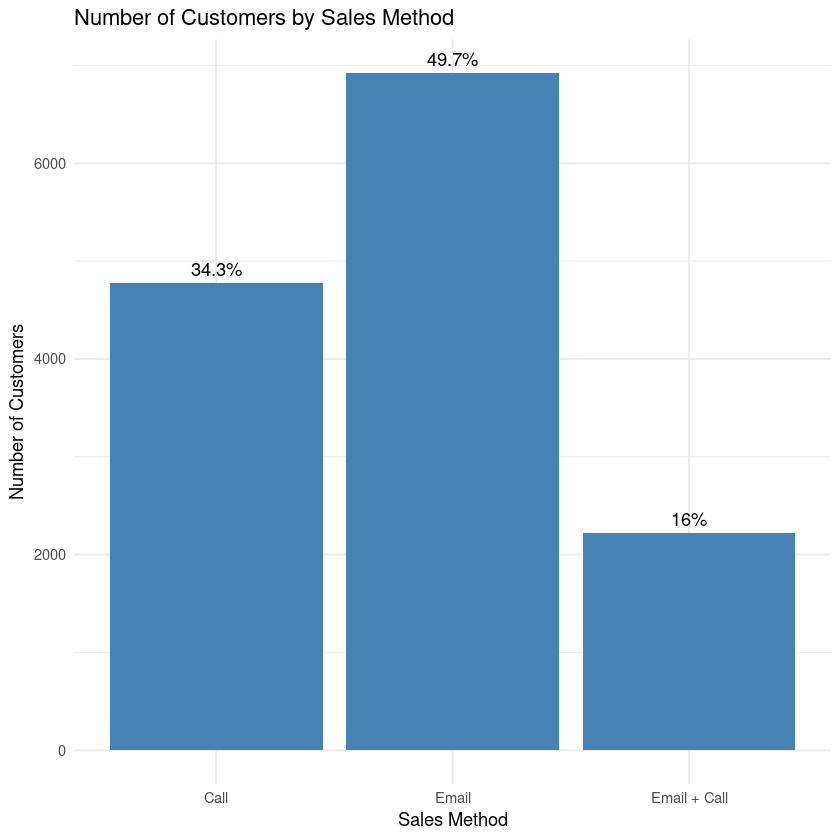

In [5]:
# Load required libraries
library(tidyverse)
library(dplyr)

# Read and clean the data
sales_data <- read.csv("product_sales.csv")

# Clean the data first
sales_clean <- sales_data %>%
  # Standardize sales method categories
  mutate(sales_method = case_when(
    tolower(sales_method) %in% c("email", "em") ~ "Email",
    tolower(sales_method) == "call" ~ "Call",
    TRUE ~ "Email + Call"
  )) %>%
  # Convert revenue to numeric and remove invalid entries
  mutate(revenue = as.numeric(revenue)) %>%
  filter(!is.na(revenue))

# Count customers by sales method
customer_counts <- sales_clean %>%
  group_by(sales_method) %>%
  summarise(
    number_of_customers = n(),
    percentage = n() / nrow(sales_clean) * 100
  ) %>%
  arrange(desc(number_of_customers))

# Display results
print(customer_counts)

# Create a bar plot
ggplot(customer_counts, aes(x = sales_method, y = number_of_customers)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            vjust = -0.5) +
  labs(title = "Number of Customers by Sales Method",
       x = "Sales Method",
       y = "Number of Customers") +
  theme_minimal()

[1] "Overall Revenue Statistics:"
  min_revenue q1_revenue median_revenue mean_revenue q3_revenue max_revenue
1       32.54      52.47           89.5     93.93494   107.3275      238.32
  sd_revenue
1   47.43531
[1] "\nRevenue Statistics by Method:"
# A tibble: 3 × 8
  sales_method min_revenue q1_revenue median_revenue mean_revenue q3_revenue
  <chr>              <dbl>      <dbl>          <dbl>        <dbl>      <dbl>
1 Call                32.5       41.5           49.1         47.6       52.7
2 Email               78.8       87.9           95.6         97.1      105. 
3 Email + Call       122.       156.           185.         184.       191. 
# ℹ 2 more variables: max_revenue <dbl>, sd_revenue <dbl>


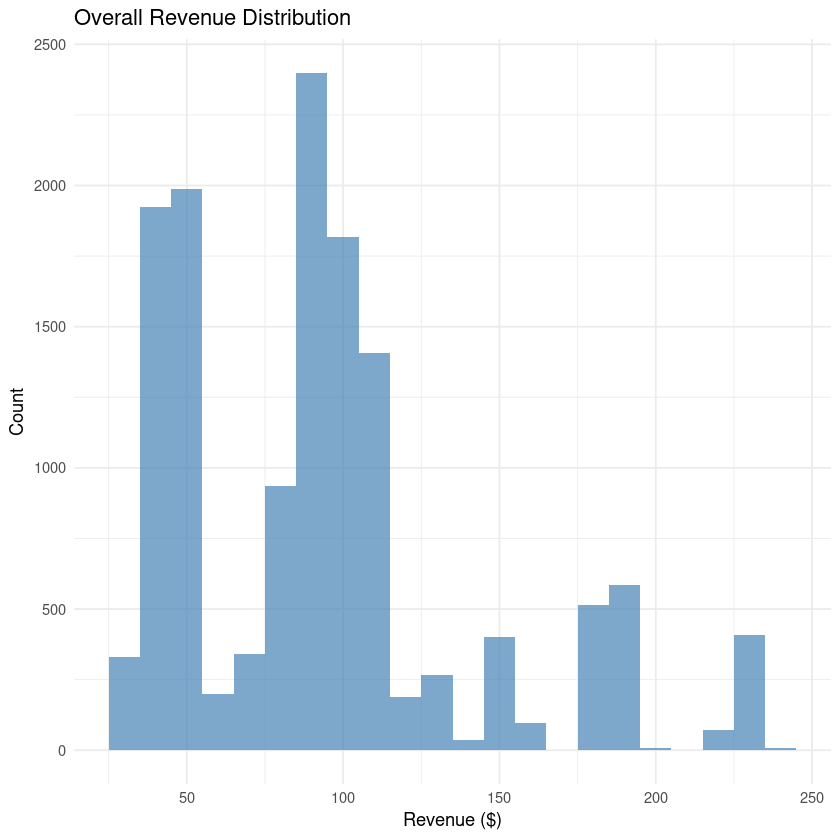

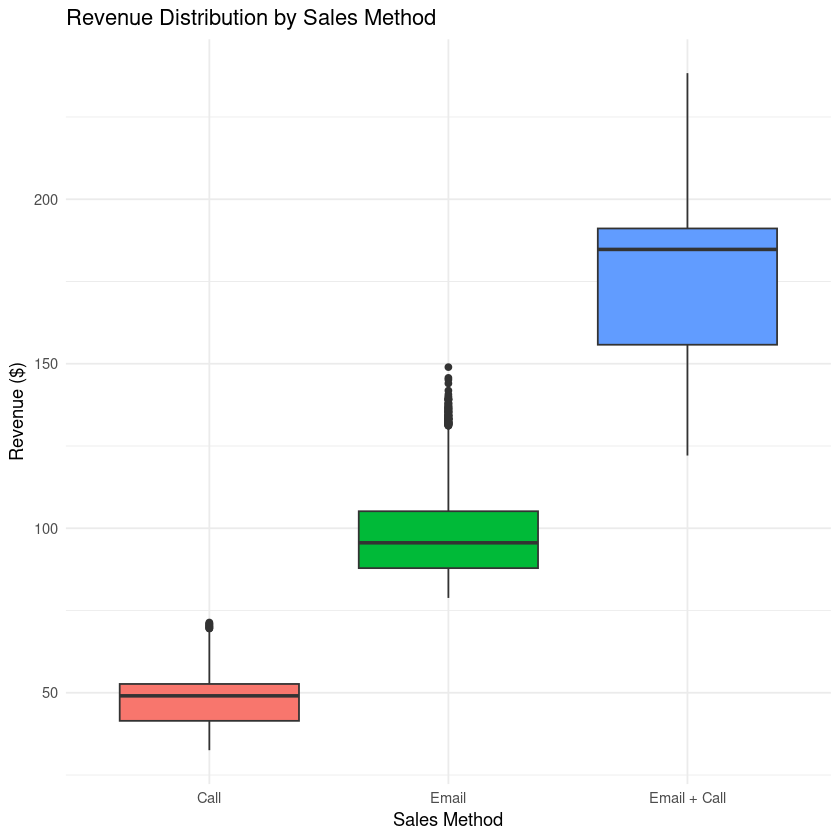

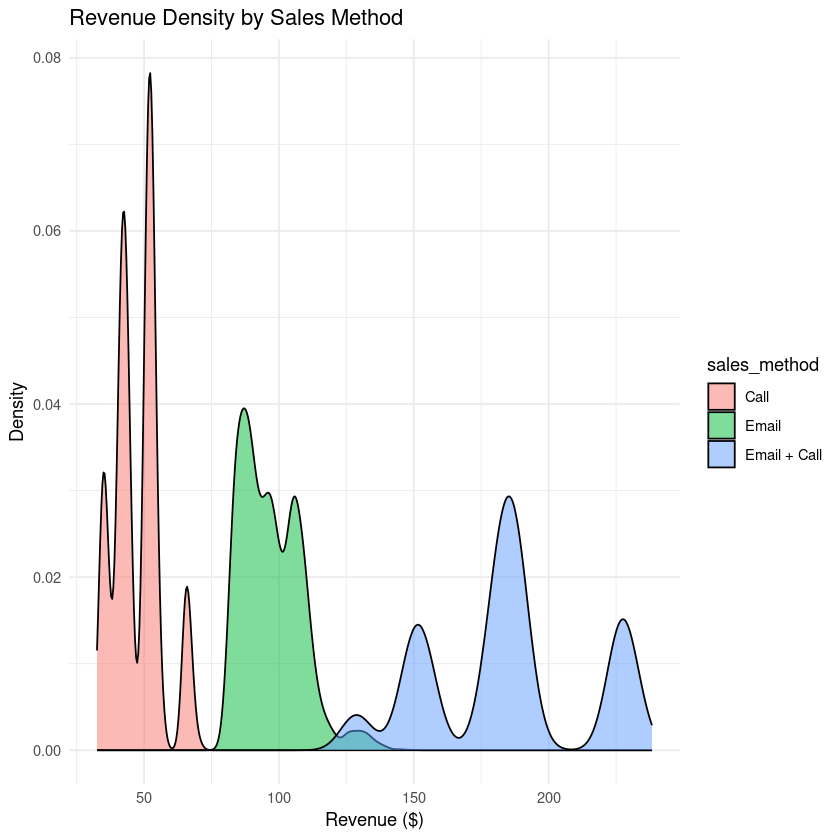

In [6]:
# Load required libraries
library(tidyverse)
library(dplyr)
library(ggplot2)

# Read and clean the data
sales_data <- read.csv("product_sales.csv")

# Clean the data
sales_clean <- sales_data %>%
  # Standardize sales method categories
  mutate(sales_method = case_when(
    tolower(sales_method) %in% c("email", "em") ~ "Email",
    tolower(sales_method) == "call" ~ "Call",
    TRUE ~ "Email + Call"
  )) %>%
  # Convert revenue to numeric and remove invalid entries
  mutate(revenue = as.numeric(revenue)) %>%
  filter(!is.na(revenue))

# Overall revenue statistics
overall_stats <- sales_clean %>%
  summarise(
    min_revenue = min(revenue),
    q1_revenue = quantile(revenue, 0.25),
    median_revenue = median(revenue),
    mean_revenue = mean(revenue),
    q3_revenue = quantile(revenue, 0.75),
    max_revenue = max(revenue),
    sd_revenue = sd(revenue)
  )

# Revenue statistics by method
method_stats <- sales_clean %>%
  group_by(sales_method) %>%
  summarise(
    min_revenue = min(revenue),
    q1_revenue = quantile(revenue, 0.25),
    median_revenue = median(revenue),
    mean_revenue = mean(revenue),
    q3_revenue = quantile(revenue, 0.75),
    max_revenue = max(revenue),
    sd_revenue = sd(revenue)
  )

# Print statistics
print("Overall Revenue Statistics:")
print(overall_stats)
print("\nRevenue Statistics by Method:")
print(method_stats)

# Create visualizations

# 1. Overall revenue distribution
p1 <- ggplot(sales_clean, aes(x = revenue)) +
  geom_histogram(binwidth = 10, fill = "steelblue", alpha = 0.7) +
  labs(title = "Overall Revenue Distribution",
       x = "Revenue ($)",
       y = "Count") +
  theme_minimal()

# 2. Box plot by method
p2 <- ggplot(sales_clean, aes(x = sales_method, y = revenue, fill = sales_method)) +
  geom_boxplot() +
  labs(title = "Revenue Distribution by Sales Method",
       x = "Sales Method",
       y = "Revenue ($)") +
  theme_minimal() +
  theme(legend.position = "none")

# 3. Density plot by method
p3 <- ggplot(sales_clean, aes(x = revenue, fill = sales_method)) +
  geom_density(alpha = 0.5) +
  labs(title = "Revenue Density by Sales Method",
       x = "Revenue ($)",
       y = "Density") +
  theme_minimal()

# Display plots
print(p1)
print(p2)
print(p3)

`summarise()` has grouped output by 'week'. You can override using the
`.groups` argument.
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`summarise()` has grouped output by 'week'. You can override using the
`.groups` argument.


[1] "Weekly Statistics by Method:"
# A tibble: 18 × 6
# Groups:   week [6]
    week sales_method mean_rev sd_rev min_rev max_rev
   <int> <chr>           <dbl>  <dbl>   <dbl>   <dbl>
 1     1 Call             35.4   1.36    32.5    40.5
 2     1 Email            87.5   4.87    78.8   113. 
 3     1 Email + Call    129.    2.76   122.    136. 
 4     2 Call             43.6   1.34    40.8    50.2
 5     2 Email           100.    4.74    91.6   124. 
 6     2 Email + Call    154.    2.67   149.    164. 
 7     3 Call             41.8   1.47    39.0    50.7
 8     3 Email            92.8   4.52    84.8   117. 
 9     3 Email + Call    150.    2.88   145.    160. 
10     4 Call             51.4   1.34    48.2    57.7
11     4 Email           109.    4.61   101.    138. 
12     4 Email + Call    181.    2.91   174.    192. 
13     5 Call             53.1   1.32    50.4    58.0
14     5 Email           109.    4.66   101.    135. 
15     5 Email + Call    188.    2.72   181.    198. 
16     

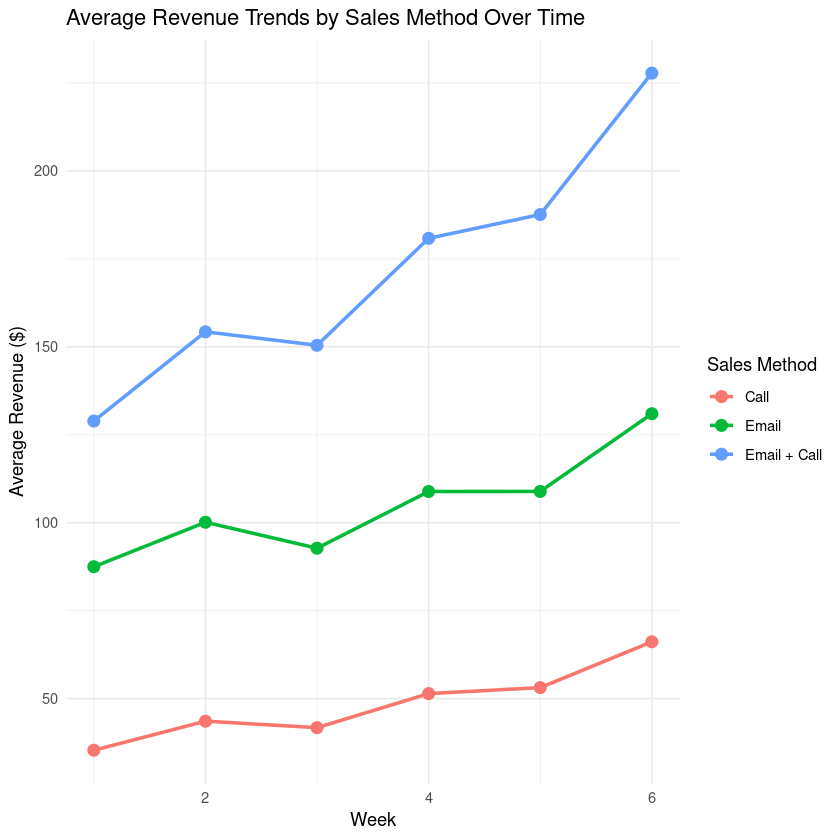

In [7]:
# Load required libraries
library(tidyverse)
library(dplyr)
library(ggplot2)

# Read and clean the data
sales_data <- read.csv("product_sales.csv")

# Clean the data
sales_clean <- sales_data %>%
  # Standardize sales method categories
  mutate(sales_method = case_when(
    tolower(sales_method) %in% c("email", "em") ~ "Email",
    tolower(sales_method) == "call" ~ "Call",
    TRUE ~ "Email + Call"
  )) %>%
  # Convert revenue to numeric and remove invalid entries
  mutate(revenue = as.numeric(revenue)) %>%
  filter(!is.na(revenue))

# Calculate average revenue by week and method
weekly_revenue <- sales_clean %>%
  group_by(week, sales_method) %>%
  summarise(
    avg_revenue = mean(revenue),
    total_revenue = sum(revenue),
    number_of_sales = n()
  ) %>%
  ungroup()

# Create time series plot
ggplot(weekly_revenue, aes(x = week, y = avg_revenue, color = sales_method, group = sales_method)) +
  geom_line(size = 1) +
  geom_point(size = 3) +
  labs(title = "Average Revenue Trends by Sales Method Over Time",
       x = "Week",
       y = "Average Revenue ($)",
       color = "Sales Method") +
  theme_minimal()

# Calculate summary statistics for each method by week
weekly_stats <- sales_clean %>%
  group_by(week, sales_method) %>%
  summarise(
    mean_rev = mean(revenue),
    sd_rev = sd(revenue),
    min_rev = min(revenue),
    max_rev = max(revenue)
  )

print("Weekly Statistics by Method:")
print(weekly_stats)